In [2]:
%pip install gensim nltk transformers torch annoy seaborn matplotlib scikit-learn PyPDF2 plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 3.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 243.6 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install gensim nltk transformers torch annoy seaborn matplotlib scikit-learn PyPDF2 plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 3.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 243.6 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import PyPDF2
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from tqdm import tqdm
import pickle

def read_pdf(file_path):
    with open(file_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        text = " ".join([page.extract_text() for page in pdf_reader.pages if page.extract_text() is not None])
    return text

def preprocess_text(text):
    # Tokenizes and processes the text. 
    # Modify as needed (e.g., lowercasing, removing stopwords)
    return word_tokenize(text.lower())

def process_pdf(file_path):
    try:
        document_text = read_pdf(file_path)
        processed_text = preprocess_text(document_text)
        return processed_text, file_path
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return [], file_path

def build_doc2vec_model(folder_path, num_papers=None, vector_size=100, window=5, min_count=2, workers=4):
    all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.pdf')]
    processed_files = all_files[:num_papers] if num_papers else all_files

    tagged_data = []
    for file_path in tqdm(processed_files):
        words, path = process_pdf(file_path)
        tagged_data.append(TaggedDocument(words=words, tags=[path]))

    model = Doc2Vec(vector_size=vector_size, window=window, min_count=min_count, workers=workers)
    model.build_vocab(tagged_data)
    model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

    return model

def create_doc_embeddings(folder_path, num_papers=None):
    model = build_doc2vec_model(folder_path, num_papers)
    
    # Corrected part: Accessing document vectors
    embeddings_dict = {tag: model.dv[tag] for tag in model.dv.key_to_index}
    
    return embeddings_dict

# Set the path to the directory containing the papers
papers_path = './PapersDirectory/papers'

# Create embeddings
embeddings_dict = create_doc_embeddings(papers_path)
# Save the embeddings dictionary
with open('doc_embeddings.pkl', 'wb') as f:
    pickle.dump(embeddings_dict, f)



  8%|▊         | 123/1464 [01:24<08:52,  2.52it/s]FloatObject (b'0.00-29537734') invalid; use 0.0 instead
FloatObject (b'0.00-29537734') invalid; use 0.0 instead
FloatObject (b'0.00-29537734') invalid; use 0.0 instead
FloatObject (b'0.00-29537734') invalid; use 0.0 instead
 12%|█▏        | 174/1464 [06:27<09:35,  2.24it/s]   FloatObject (b'0.000000000-2217712') invalid; use 0.0 instead
FloatObject (b'0.000000000-4435424') invalid; use 0.0 instead
FloatObject (b'0.000000000-2217712') invalid; use 0.0 instead
FloatObject (b'0.000000000-4435424') invalid; use 0.0 instead
 22%|██▏       | 324/1464 [12:53<07:02,  2.70it/s]   FloatObject (b'0.00-6711408') invalid; use 0.0 instead
FloatObject (b'0.00-6711408') invalid; use 0.0 instead
 36%|███▋      | 531/1464 [15:37<09:48,  1.59it/s] impossible to decode XFormObject /F1-DejaVuSans-Idotaccent
 impossible to decode XFormObject /F1-DejaVuSans-Idotaccent
 49%|████▉     | 720/1464 [18:06<05:40,  2.19it/s]unknown widths : 
[0, IndirectObject(453, 

In [29]:
import os
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import PyPDF2
from tqdm import tqdm

def read_pdf(file_path):
    with open(file_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        text = " ".join([page.extract_text() for page in pdf_reader.pages if page.extract_text() is not None])
    return text

def preprocess_text(text):
    return word_tokenize(text.lower())

def process_pdf(file_path):
    try:
        document_text = read_pdf(file_path)
        processed_text = preprocess_text(document_text)
        return processed_text
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return []

# Paths of specific documents
specific_docs_paths = [
    "/Users/aayushgupta/Downloads/2311.09277.pdf",
    "/Users/aayushgupta/Downloads/2305.10601.pdf",
    "/Users/aayushgupta/Downloads/2308.09687.pdf",
    "/Users/aayushgupta/Downloads/2201.11903.pdf"
]

# Tagged data for Doc2Vec
tagged_data = [TaggedDocument(words=process_pdf(path), tags=[path]) for path in specific_docs_paths]

# Build the Doc2Vec model
model = Doc2Vec(vector_size=100, window=5, min_count=2, workers=4, epochs=40)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

# Extract embeddings
specific_docs_embeddings = {doc.tags[0]: model.dv[doc.tags[0]] for doc in tagged_data}


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


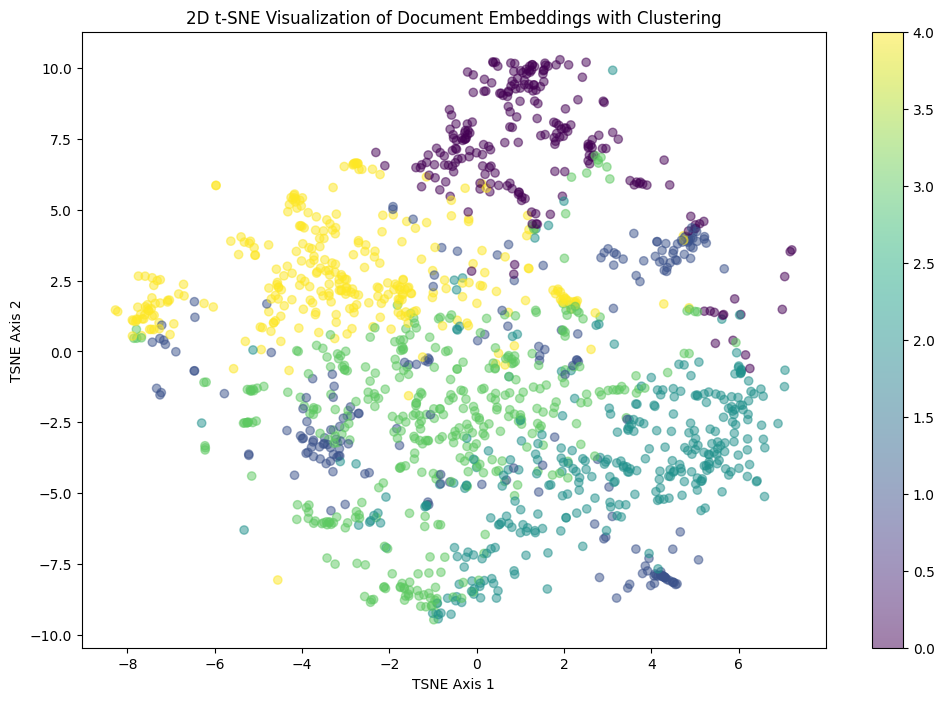

In [30]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np
import pickle

# Load embeddings
with open('doc_embeddings.pkl', 'rb') as f:
    embeddings_dict = pickle.load(f)

# Prepare data for t-SNE
tags, embeddings = zip(*embeddings_dict.items())
embeddings = np.array(embeddings)

# t-SNE for 2D reduction
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
reduced_embeddings = tsne.fit_transform(embeddings)

# Clustering for color differentiation
num_clusters = 5  # Adjust based on your data
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(embeddings)  # clustering on original embeddings

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot with cluster-based coloring
scatter = ax.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=clusters, cmap='viridis', alpha=0.5)

# Highlight specific documents
specific_docs_labels = {
    "/Users/aayushgupta/Downloads/2311.09277.pdf": "Contrastive CoT",
    "/Users/aayushgupta/Downloads/2305.10601.pdf": "Tree-of-Thought",
    "/Users/aayushgupta/Downloads/2308.09687.pdf": "Graph-of-Thought",
    "/Users/aayushgupta/Downloads/2201.11903.pdf": "Chain-of-Thought"
}

# Adjust text positioning if needed
text_offset_x = 1
text_offset_y = 1

for path, label in specific_docs_labels.items():
    if path in tags:
        idx = tags.index(path)
        ax.scatter(reduced_embeddings[idx, 0], reduced_embeddings[idx, 1], color='red', s=50)
        ax.text(reduced_embeddings[idx, 0] + text_offset_x, reduced_embeddings[idx, 1] + text_offset_y, label, fontsize=10, color='black')

ax.set_xlabel('TSNE Axis 1')
ax.set_ylabel('TSNE Axis 2')
plt.title('2D t-SNE Visualization of Document Embeddings with Clustering')
plt.colorbar(scatter)
plt.show()


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


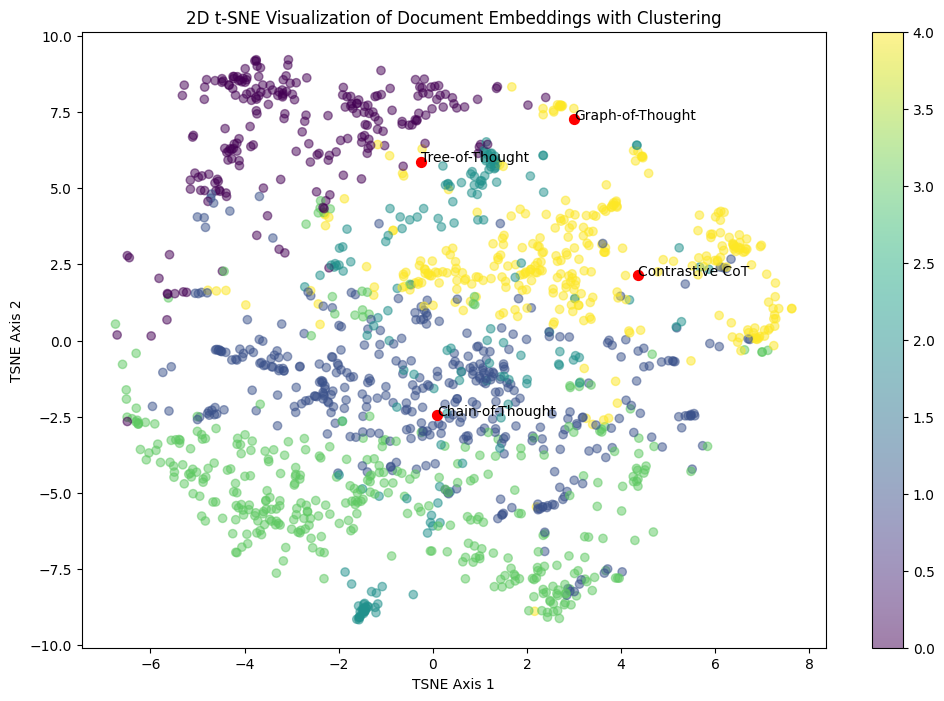

In [32]:
import os
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np
import pickle

# Define the method to generate embeddings for a document (Adjust as per your embedding method)
def generate_embedding_for_doc(file_path):
    # Read and preprocess the document
    document_text = read_pdf(file_path)
    preprocessed_text = preprocess_text(document_text)

    # Generate embeddings (using your model)
    embedding = model.infer_vector(preprocessed_text)
    return embedding

# Load existing embeddings
with open('doc_embeddings.pkl', 'rb') as f:
    embeddings_dict = pickle.load(f)

# Specific documents to include
specific_docs_labels = {
    "/Users/aayushgupta/Downloads/2311.09277.pdf": "Contrastive CoT",
    "/Users/aayushgupta/Downloads/2305.10601.pdf": "Tree-of-Thought",
    "/Users/aayushgupta/Downloads/2308.09687.pdf": "Graph-of-Thought",
    "/Users/aayushgupta/Downloads/2201.11903.pdf": "Chain-of-Thought"
}

# Generate and add embeddings for specific documents
for doc_path in specific_docs_labels.keys():
    embedding = generate_embedding_for_doc(doc_path)
    embeddings_dict[doc_path] = embedding

# Prepare data for t-SNE
tags, embeddings = zip(*embeddings_dict.items())
embeddings = np.array(embeddings)

# t-SNE for 2D reduction
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
reduced_embeddings = tsne.fit_transform(embeddings)

# Clustering for color differentiation
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(embeddings)

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=clusters, cmap='viridis', alpha=0.5)

# Highlight and label specific documents
for path, label in specific_docs_labels.items():
    if path in tags:
        idx = tags.index(path)
        ax.scatter(reduced_embeddings[idx, 0], reduced_embeddings[idx, 1], color='red', s=50)
        ax.text(reduced_embeddings[idx, 0], reduced_embeddings[idx, 1], label, fontsize=10, color='black')

ax.set_xlabel('TSNE Axis 1')
ax.set_ylabel('TSNE Axis 2')
plt.title('2D t-SNE Visualization of Document Embeddings with Clustering')
plt.colorbar(scatter)
plt.show()


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


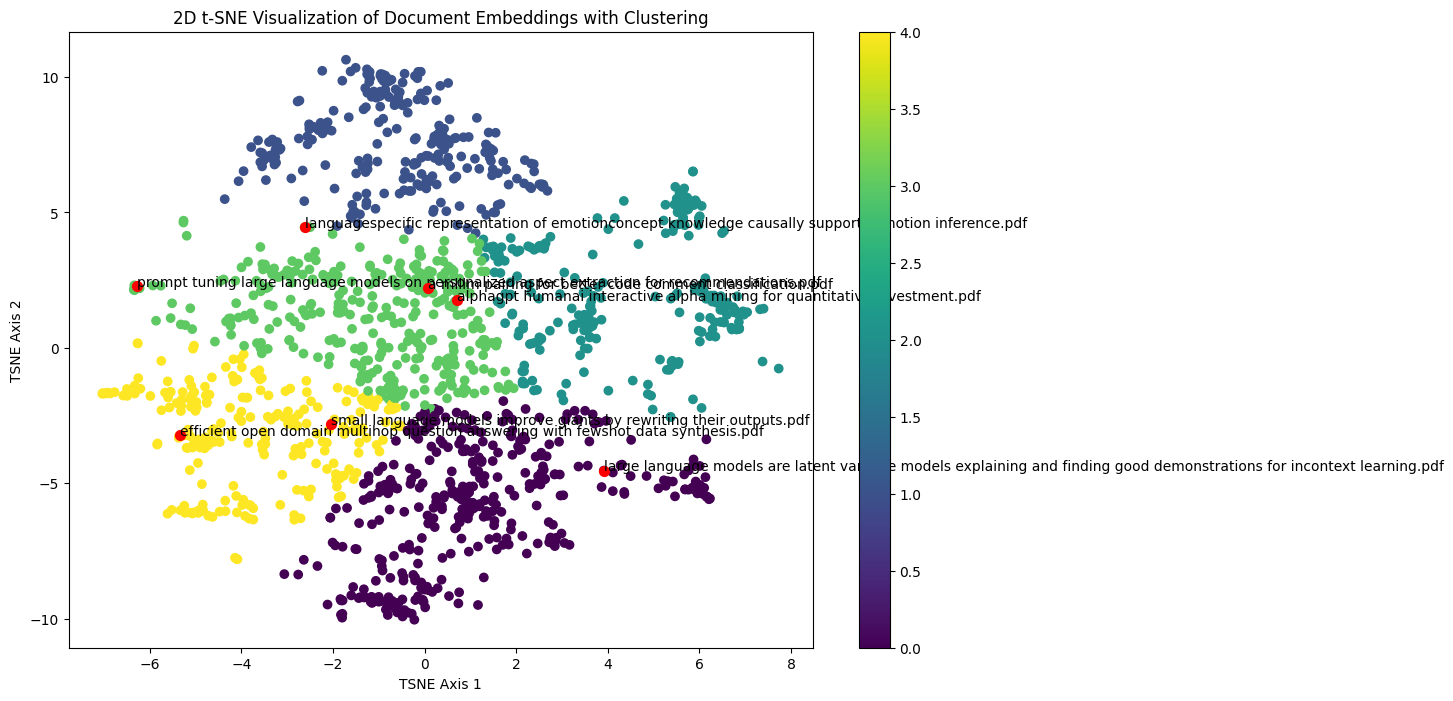

In [28]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import random

# Load embeddings
with open('doc_embeddings.pkl', 'rb') as f:
    embeddings_dict = pickle.load(f)

# Prepare data for t-SNE
tags, embeddings = zip(*embeddings_dict.items())
embeddings = np.array(embeddings)

# t-SNE for dimensionality reduction to 2D
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
reduced_embeddings = tsne.fit_transform(embeddings)

# Use KMeans for clustering
num_clusters = 5  # Adjust as needed for your data
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(reduced_embeddings)

# Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

# Color map based on cluster membership
scatter = ax.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=clusters, cmap='viridis')

# Select and plot 5 random documents
random_indices = random.sample(range(len(tags)), 7)
for i in random_indices:
    ax.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], color='red', s=50)
    ax.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], '%s' % (tags[i].split('/')[-1]), size=10, zorder=1)

ax.set_xlabel('TSNE Axis 1')
ax.set_ylabel('TSNE Axis 2')
plt.title('2D t-SNE Visualization of Document Embeddings with Clustering')
plt.colorbar(scatter)
plt.show()
